# Import Packages and Dataset

In [0]:
%tensorflow_version 2.x

## Packages

In [63]:
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import GlobalAveragePooling1D

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,hamming_loss

from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Dataset

Use without stopword dataset

In [64]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
train_path = '/content/gdrive/My Drive/Colab Notebooks/TA/dataset/data_train_trans_nostopword_preprocessed.csv'

data_train = pd.read_csv(train_path,sep=";")

In [66]:
data_train.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_Parsed
0,- kdg will be kind enough to show you how to l...,0,1,0,0,0,0,0,0,0,0,0,0,kadang akan cukup baik untuk tunjuk anda bagai...
1,Ternyata komunis juga bisa nangis',0,0,0,0,0,0,0,0,0,0,0,0,nyata komunis also can menang
2,USER USER Kenapa harus bom ya? Kek yg benar nu...,0,0,0,0,0,0,0,0,0,0,0,0,guna guna kenapa harus bom seperti benar tun...
3,USER Sumpaaah kaya kalo abis IAA dilanjut olim...,0,0,0,0,0,0,0,0,0,0,0,0,guna sumpah kaya kalau habis iya lanjut olimpi...
4,RT USER USER USER USER USER fungsi media sosia...,1,0,1,0,0,0,0,0,1,1,0,0,medium fungsi fungsi rt guna guna guna guna gu...


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_Parsed
0,- kdg will be kind enough to show you how to l...,0,1,0,0,0,0,0,0,0,0,0,0,kadang akan cukup baik untuk tunjuk anda bagai...
1,Ternyata komunis juga bisa nangis',0,0,0,0,0,0,0,0,0,0,0,0,nyata komunis also can menang
2,USER USER Kenapa harus bom ya? Kek yg benar nu...,0,0,0,0,0,0,0,0,0,0,0,0,guna guna kenapa harus bom seperti benar tun...
3,USER Sumpaaah kaya kalo abis IAA dilanjut olim...,0,0,0,0,0,0,0,0,0,0,0,0,guna sumpah kaya kalau habis iya lanjut olimpi...
4,RT USER USER USER USER USER fungsi media sosia...,1,0,1,0,0,0,0,0,1,1,0,0,medium fungsi fungsi rt guna guna guna guna gu...


In [0]:
test_path = '/content/gdrive/My Drive/Colab Notebooks/TA/dataset/data_test_trans_nostopword_preprocessed.csv'

data_test = pd.read_csv(test_path,sep=";")

In [68]:
data_test.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_Parsed
0,GANTENG TAPI BERENGSEK!!! BUAT APA?!!\nWHO DO ...,1,1,1,0,0,0,0,0,1,1,0,0,ganteng tapi berengsek buat apa anda pikir an...
1,Sakit jiwa kali yah..,0,0,0,0,0,0,0,0,0,0,0,0,sakit jiwa kali
2,"Does insulting one for being ""Cina"", ""Kafir"", ...",0,1,0,0,0,0,0,0,0,0,0,0,tidak hina satu untuk jadi cina kafir buat and...
3,USER USER Karena partaimu pdip itu bajingan',1,1,0,1,0,0,0,0,1,0,1,0,guna guna karena partai partai demokrasi indon...
4,USER USER Jgn salah itu janji jokowi yg di tun...,1,1,1,0,0,0,0,0,1,1,0,0,guna guna jangan shalat itu janji jokowi di t...


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_Parsed
0,GANTENG TAPI BERENGSEK!!! BUAT APA?!!\nWHO DO ...,1,1,1,0,0,0,0,0,1,1,0,0,ganteng tapi berengsek buat apa anda pikir an...
1,Sakit jiwa kali yah..,0,0,0,0,0,0,0,0,0,0,0,0,sakit jiwa kali
2,"Does insulting one for being ""Cina"", ""Kafir"", ...",0,1,0,0,0,0,0,0,0,0,0,0,tidak hina satu untuk jadi cina kafir buat and...
3,USER USER Karena partaimu pdip itu bajingan',1,1,0,1,0,0,0,0,1,0,1,0,guna guna karena partai partai demokrasi indon...
4,USER USER Jgn salah itu janji jokowi yg di tun...,1,1,1,0,0,0,0,0,1,1,0,0,guna guna jangan shalat itu janji jokowi di t...


In [0]:
val_path = '/content/gdrive/My Drive/Colab Notebooks/TA/dataset/data_val_trans_nostopword_preprocessed.csv'

data_val = pd.read_csv(val_path,sep=";")

In [70]:
data_val.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_Parsed
0,So much berengsek people in the world,1,1,0,1,0,0,0,0,1,0,1,0,orang berengsek dunia
1,"So, how can I get my REKBER?? rekening berengsek.",0,1,0,0,0,0,0,0,0,0,0,0,brengsek rekening rekening brengsek
2,RT USER: dasar bajingan!\xf0\x9f\x98\xa0 URL,0,1,0,0,0,0,0,0,0,0,0,0,dasar dasar bajing
3,USER Krn cebong tdk akn mengakui pria lajang y...,1,1,0,1,0,0,0,0,1,0,1,0,kecebong pria lajang lulu sastra profesor revi...
4,"RT USER: ga ada urusannya, monyet. gua broken ...",1,1,1,0,0,0,0,0,1,1,0,0,urus monyet break home teman teman kaya raya h


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_Parsed
0,So much berengsek people in the world,1,1,0,1,0,0,0,0,1,0,1,0,orang berengsek dunia
1,"So, how can I get my REKBER?? rekening berengsek.",0,1,0,0,0,0,0,0,0,0,0,0,brengsek rekening rekening brengsek
2,RT USER: dasar bajingan!\xf0\x9f\x98\xa0 URL,0,1,0,0,0,0,0,0,0,0,0,0,dasar dasar bajing
3,USER Krn cebong tdk akn mengakui pria lajang y...,1,1,0,1,0,0,0,0,1,0,1,0,kecebong pria lajang lulu sastra profesor revi...
4,"RT USER: ga ada urusannya, monyet. gua broken ...",1,1,1,0,0,0,0,0,1,1,0,0,urus monyet break home teman teman kaya raya h


# Features Target Split

In [0]:
X_train = data_train['Tweet_Parsed']
y_train = data_train.drop(['Tweet','Tweet_Parsed'],axis=1)

X_val = data_val['Tweet_Parsed']
y_val = data_val.drop(['Tweet','Tweet_Parsed'],axis=1)

X_test = data_test['Tweet_Parsed']
y_test = data_test.drop(['Tweet','Tweet_Parsed'],axis=1)

# Size of Vocabulary

In [0]:
vocab_size = 1000

In [73]:
vect = Tokenizer(num_words = vocab_size)
vect.fit_on_texts(X_train)
# vocab_size = len(vect.word_index)+1

print(vocab_size)

1000
1000


# Modelling with CNN

## Padding and preparing input sequences

In [74]:
encoded_docs_train = vect.texts_to_sequences(X_train)
padded_docs_train = sequence.pad_sequences(encoded_docs_train,maxlen=100,padding='post')
print(padded_docs_train)

[[551  39 386 ...   0   0   0]
 [138  68  49 ...   0   0   0]
 [  1   1  98 ...   0   0   0]
 ...
 [154 135  18 ...   0   0   0]
 [102   8 353 ...   0   0   0]
 [539   9  50 ...   0   0   0]]
[[551  39 386 ...   0   0   0]
 [138  68  49 ...   0   0   0]
 [  1   1  98 ...   0   0   0]
 ...
 [154 135  18 ...   0   0   0]
 [102   8 353 ...   0   0   0]
 [539   9  50 ...   0   0   0]]


In [75]:
encoded_docs_val = vect.texts_to_sequences(X_val)
padded_docs_val = sequence.pad_sequences(encoded_docs_val,maxlen=100,padding='post')
print(padded_docs_val)

[[ 19 273 188 ...   0   0   0]
 [616 616   0 ...   0   0   0]
 [ 91  91 275 ...   0   0   0]
 ...
 [934   0   0 ...   0   0   0]
 [291 126  19 ...   0   0   0]
 [112 814 190 ...   0   0   0]]
[[ 19 273 188 ...   0   0   0]
 [616 616   0 ...   0   0   0]
 [ 91  91 275 ...   0   0   0]
 ...
 [934   0   0 ...   0   0   0]
 [291 126  19 ...   0   0   0]
 [112 814 190 ...   0   0   0]]


In [76]:
encoded_docs_test = vect.texts_to_sequences(X_test)
padded_docs_test = sequence.pad_sequences(encoded_docs_test,maxlen=100,padding='post')
print(padded_docs_test)

[[968  34 273 ...   0   0   0]
 [270 661 217 ...   0   0   0]
 [  2 344  53 ...   0   0   0]
 ...
 [323  87 186 ...   0   0   0]
 [  1   1  58 ...   0   0   0]
 [  1 214   5 ...   0   0   0]]
[[968  34 273 ...   0   0   0]
 [270 661 217 ...   0   0   0]
 [  2 344  53 ...   0   0   0]
 ...
 [323  87 186 ...   0   0   0]
 [  1   1  58 ...   0   0   0]
 [  1 214   5 ...   0   0   0]]


## Define Model

In [77]:
model = Sequential()
# Configuring the parameters
model.add(Embedding(vocab_size, output_dim=64, input_length=100))
model.add(Conv1D(128,5, activation="relu"))
model.add(GlobalAveragePooling1D())
model.add(Dense(64, activation="relu"))
model.add(Dense(12, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 64)           64000     
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 12)                780       
Total params: 114,124
Trainable params: 114,124
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                

## Training Model

In [78]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(padded_docs_train, y_train.values, 
                    validation_data=(padded_docs_val, y_val.values),
                    epochs=35, batch_size=256, 
                    verbose=2)

Epoch 1/35
52/52 - 1s - loss: 0.4838 - accuracy: 0.5714 - val_loss: 0.3885 - val_accuracy: 0.8302
Epoch 2/35
52/52 - 1s - loss: 0.3812 - accuracy: 0.2866 - val_loss: 0.3851 - val_accuracy: 0.1698
Epoch 3/35
52/52 - 1s - loss: 0.3769 - accuracy: 0.1893 - val_loss: 0.3820 - val_accuracy: 0.1760
Epoch 4/35
52/52 - 1s - loss: 0.3617 - accuracy: 0.2733 - val_loss: 0.3645 - val_accuracy: 0.2113
Epoch 5/35
52/52 - 1s - loss: 0.3270 - accuracy: 0.4129 - val_loss: 0.3430 - val_accuracy: 0.3519
Epoch 6/35
52/52 - 1s - loss: 0.3055 - accuracy: 0.4685 - val_loss: 0.3306 - val_accuracy: 0.3764
Epoch 7/35
52/52 - 1s - loss: 0.2905 - accuracy: 0.4650 - val_loss: 0.3259 - val_accuracy: 0.3933
Epoch 8/35
52/52 - 1s - loss: 0.2814 - accuracy: 0.4559 - val_loss: 0.3179 - val_accuracy: 0.4395
Epoch 9/35
52/52 - 1s - loss: 0.2730 - accuracy: 0.4700 - val_loss: 0.3173 - val_accuracy: 0.4613
Epoch 10/35
52/52 - 1s - loss: 0.2680 - accuracy: 0.4703 - val_loss: 0.3141 - val_accuracy: 0.4518
Epoch 11/35
52/52 -

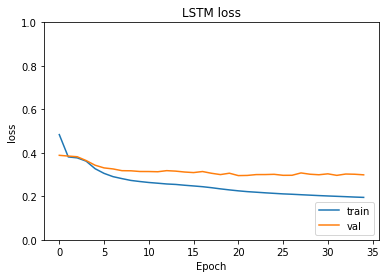

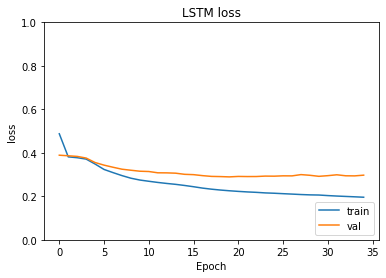

In [79]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.ylim(0,1)
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [80]:
# Final evaluation of the model
scores = model.evaluate(padded_docs_test, y_test.values)

print("Accuracy: %.2f%%" % (scores[1]*100))

115/115 [==============================] - 0s 3ms/step - loss: 0.2719 - accuracy: 0.4647
Accuracy: 46.47%
115/115 [==============================] - 0s 2ms/step - loss: 0.2657 - accuracy: 0.4704
Accuracy: 47.04%


# Save Model

In [0]:
model.save('/content/gdrive/My Drive/Colab Notebooks/TA/modelCNN_trans_nostopword.h5')

# Predict and Result

## Predict Data Test

In [0]:
predict = model.predict(padded_docs_test)
predict_train = model.predict(padded_docs_train)
predict_val = model.predict(padded_docs_val)
thresholds=0.5

In [0]:
def labelSetAccuracy(y_true, y_pred):
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
#         print('\nset_true: {0}'.format(set_true))
#         print('set_pred: {0}'.format(set_pred))
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        #print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)
    return np.mean(acc_list)

In [84]:
pred_test = predict.copy()
pred_test[pred_test>=0.5] = 1
pred_test[pred_test<0.5] = 0
acc = accuracy_score(y_test.values,pred_test)
haml_loss = hamming_loss(y_test.values,pred_test)
label_acc = labelSetAccuracy(y_test.values,pred_test)
print("threshold = ",thresholds)
print("exact accuracy = ", acc)
print("hamming loss = ",haml_loss)
print("label based accuracy = ",label_acc)
print("==============================")

threshold =  0.5
exact accuracy =  0.5293478260869565
hamming loss =  0.10994112318840579
label based accuracy =  0.6643030753968253
threshold =  0.5
exact accuracy =  0.5364130434782609
hamming loss =  0.10713315217391305
label based accuracy =  0.6669798136645964


In [85]:
pred_train = predict_train.copy()
pred_train[pred_train>=0.5] = 1
pred_train[pred_train<0.5] = 0
acc = accuracy_score(y_train.values,pred_train)
haml_loss = hamming_loss(y_train.values,pred_train)
label_acc = labelSetAccuracy(y_train.values,pred_train)
print("threshold = ",thresholds)
print("exact accuracy = ", acc)
print("hamming loss = ",haml_loss)
print("label based accuracy = ",label_acc)
print("==============================")


threshold =  0.5
exact accuracy =  0.6223950468136514
hamming loss =  0.07741870532568207
label based accuracy =  0.7597325293753865
threshold =  0.5
exact accuracy =  0.6220175173663546
hamming loss =  0.07741241316822713
label based accuracy =  0.7565314991394726


In [86]:
pred_val = predict_val.copy()
pred_val[pred_val>=0.5] = 1
pred_val[pred_val<0.5] = 0
acc = accuracy_score(y_val.values,pred_val)
haml_loss = hamming_loss(y_val.values,pred_val)
label_acc = labelSetAccuracy(y_val.values,pred_val)
print("threshold = ",thresholds)
print("exact accuracy = ", acc)
print("hamming loss = ",haml_loss)
print("label based accuracy = ",label_acc)
print("==============================")

threshold =  0.5
exact accuracy =  0.4938858695652174
hamming loss =  0.12567934782608695
label based accuracy =  0.6266336697722568
threshold =  0.5
exact accuracy =  0.49796195652173914
hamming loss =  0.1247169384057971
label based accuracy =  0.62812095626294


## Analysis Result

### Data Validation Predict Result Analysis

In [0]:
data_val = pd.DataFrame(data=X_val,columns=['Tweet_Parsed']).join(y_val).reset_index(drop=True)

In [88]:
data_val.head()

,Tweet_Parsed,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,orang berengsek dunia,1,1,0,1,0,0,0,0,1,0,1,0
1,brengsek rekening rekening brengsek,0,1,0,0,0,0,0,0,0,0,0,0
2,dasar dasar bajing,0,1,0,0,0,0,0,0,0,0,0,0
3,kecebong pria lajang lulu sastra profesor revi...,1,1,0,1,0,0,0,0,1,0,1,0
4,urus monyet break home teman teman kaya raya h,1,1,1,0,0,0,0,0,1,1,0,0


,Tweet_Parsed,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,orang berengsek dunia,1,1,0,1,0,0,0,0,1,0,1,0
1,brengsek rekening rekening brengsek,0,1,0,0,0,0,0,0,0,0,0,0
2,dasar dasar bajing,0,1,0,0,0,0,0,0,0,0,0,0
3,kecebong pria lajang lulu sastra profesor revi...,1,1,0,1,0,0,0,0,1,0,1,0
4,urus monyet break home teman teman kaya raya h,1,1,1,0,0,0,0,0,1,1,0,0


In [0]:
data_val_predict = pd.DataFrame(data=X_val,columns=['Tweet_Parsed']).reset_index(drop=True).join(pd.DataFrame(data=pred_val, columns=y_val.columns))

In [90]:
data_val_predict.head()

,Tweet_Parsed,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,orang berengsek dunia,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,brengsek rekening rekening brengsek,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,dasar dasar bajing,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,kecebong pria lajang lulu sastra profesor revi...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,urus monyet break home teman teman kaya raya h,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Tweet_Parsed,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,orang berengsek dunia,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,brengsek rekening rekening brengsek,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,dasar dasar bajing,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,kecebong pria lajang lulu sastra profesor revi...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,urus monyet break home teman teman kaya raya h,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Check Number of Label on Predict Data

In [0]:
label_size0_val = []
label_size1_val = []

for i in data_val.columns[1:]:
    label_size0_val.append(len(data_val[data_val[i]==0]))
    label_size1_val.append(len(data_val[data_val[i]==1]))

label_size0_val_predict = []
label_size1_val_predict = []

for i in data_val_predict.columns[1:]:
    label_size0_val_predict.append(len(data_val_predict[data_val_predict[i]==0]))
    label_size1_val_predict.append(len(data_val_predict[data_val_predict[i]==1]))

In [0]:
dat_anls_val = pd.DataFrame({
    'label' : data_val.columns[1:],
    'stats' : ["negative" for i in range(len(data_val.columns[1:]))],
    'jumlah' : label_size0_val
}).append(
    pd.DataFrame({
        'label' : data_val.columns[1:],
        'stats' : ["positive" for i in range(len(data_val.columns[1:]))],
        'jumlah' : label_size1_val
    })
)

# dat_anls_val = dat_anls_val.set_index(['label'], drop=True)

dat_anls_val_predict = pd.DataFrame({
    'label' : data_val_predict.columns[1:],
    'stats' : ["negative" for i in range(len(data_val_predict.columns[1:]))],
    'jumlah' : label_size0_val_predict
}).append(
    pd.DataFrame({
        'label' : data_val_predict.columns[1:],
        'stats' : ["positive" for i in range(len(data_val_predict.columns[1:]))],
        'jumlah' : label_size1_val_predict
    })
)

# dat_anls_val_predict = dat_anls_val_predict.set_index(['label'], drop=True)

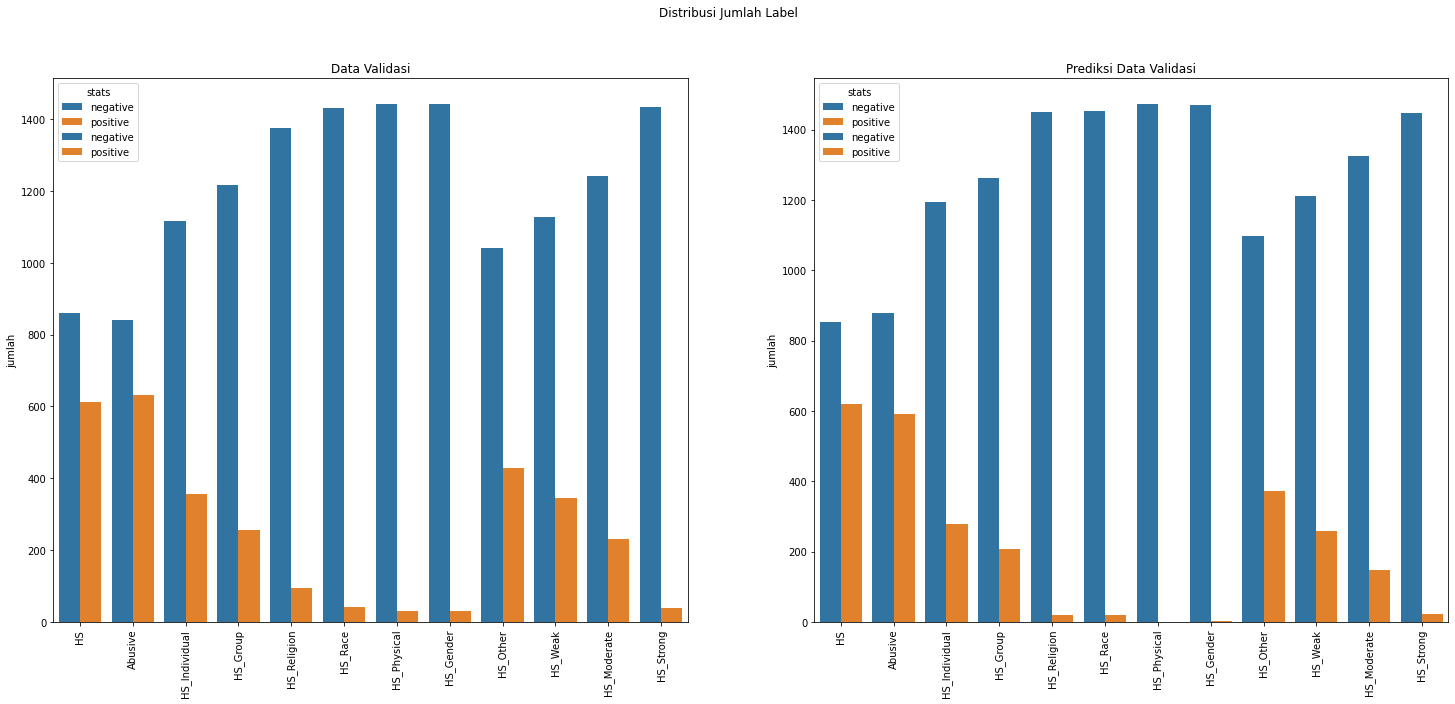

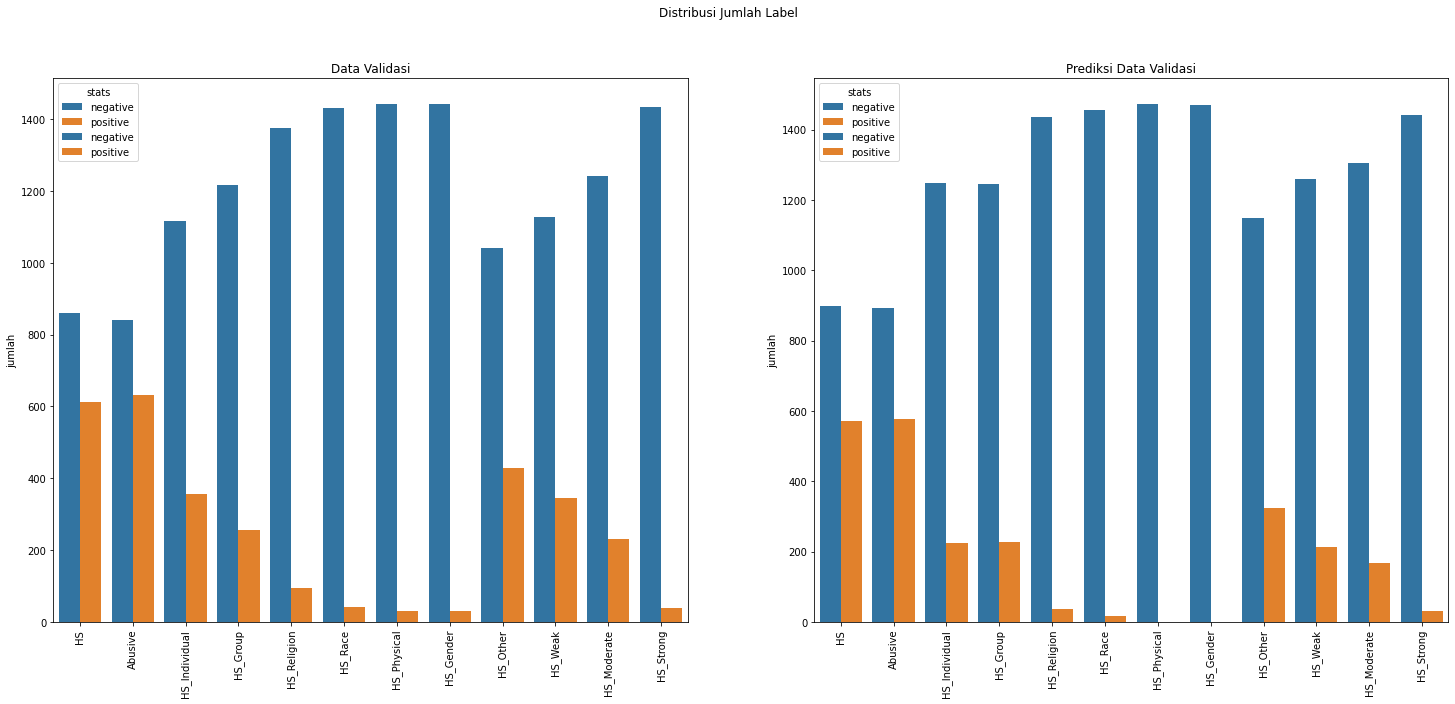

In [93]:
plt.figure(figsize=(25,10))
plt.suptitle('Distribusi Jumlah Label')

plt.subplot(1,2,1)
sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_val).set_xticklabels(sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_val).get_xticklabels(),rotation=90)
plt.title("Data Validasi")
plt.xlabel('')

plt.subplot(1,2,2)
sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_val_predict).set_xticklabels(sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_val_predict).get_xticklabels(),rotation=90)
plt.title("Prediksi Data Validasi")
plt.xlabel('')

plt.show()

In [94]:
pd.DataFrame({
    "label" : data_val.columns[1:],
    "negative (true)" : dat_anls_val[dat_anls_val['stats'] == "negative"]["jumlah"].values,
    "positive (true)" : dat_anls_val[dat_anls_val['stats'] == "positive"]["jumlah"].values,
    "negative (predict)" : dat_anls_val_predict[dat_anls_val_predict['stats'] == "negative"]["jumlah"].values,
    "positive (predict)" : dat_anls_val_predict[dat_anls_val_predict['stats'] == "positive"]["jumlah"].values
})

,label,negative (true),positive (true),negative (predict),positive (predict)
0,HS,859,613,852,620
1,Abusive,840,632,880,592
2,HS_Individual,1115,357,1193,279
3,HS_Group,1216,256,1263,209
4,HS_Religion,1376,96,1451,21
5,HS_Race,1431,41,1453,19
6,HS_Physical,1441,31,1472,0
7,HS_Gender,1441,31,1470,2
8,HS_Other,1042,430,1099,373
9,HS_Weak,1128,344,1212,260


,label,negative (true),positive (true),negative (predict),positive (predict)
0,HS,859,613,899,573
1,Abusive,840,632,894,578
2,HS_Individual,1115,357,1248,224
3,HS_Group,1216,256,1245,227
4,HS_Religion,1376,96,1435,37
5,HS_Race,1431,41,1455,17
6,HS_Physical,1441,31,1472,0
7,HS_Gender,1441,31,1471,1
8,HS_Other,1042,430,1148,324
9,HS_Weak,1128,344,1259,213


#### OOV Check

In [0]:
def generate_ngrams(s):
    
    # Break sentence in the token, remove empty tokens
    tokens = [token for token in s.str.split(" ") if token != ""]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = np.concatenate(tokens)
    return ngrams

def oov(fitur,token):
    outOfVocab = []
    for i in token:
        if i not in fitur:
            outOfVocab.append(i)
    return outOfVocab

def oov_count(oovList):
    oovCount = {}
    for i in oovList:
        if i in oovCount.keys():
            oovCount[i] = oovCount[i]+1
        else:
            oovCount[i] = 1
    return oovCount

In [0]:
join_data_val = data_val.join(data_val_predict.drop(['Tweet_Parsed'],axis=1),rsuffix="_predict")

In [0]:
miss_exact_tweet_val = join_data_val[(join_data_val["HS"]!=join_data_val["HS_predict"]) | (join_data_val["Abusive"] != join_data_val["Abusive_predict"]) | (join_data_val["HS_Individual"] != join_data_val["HS_Individual_predict"]) | (join_data_val["HS_Group"] != join_data_val["HS_Group_predict"]) | (join_data_val["HS_Religion"] != join_data_val["HS_Religion_predict"]) | (join_data_val["HS_Race"] != join_data_val["HS_Race"]) | (join_data_val["HS_Physical"] != join_data_val["HS_Physical_predict"]) | (join_data_val["HS_Gender"] != join_data_val["HS_Gender_predict"]) | (join_data_val["HS_Other"] != join_data_val["HS_Other_predict"]) | (join_data_val["HS_Weak_predict"] != join_data_val["HS_Weak_predict"]) | (join_data_val["HS_Moderate_predict"] != join_data_val["HS_Moderate_predict"]) | (join_data_val["HS_Strong_predict"] != join_data_val["HS_Strong_predict"])]

In [0]:
oov_val = oov(vect.index_word.values(), generate_ngrams(miss_exact_tweet_val['Tweet_Parsed']))
oov_val_count = oov_count(oov_val)

In [99]:
oov_val_count

{'': 2,
 'aborsi': 1,
 'aese': 1,
 'ahad': 1,
 'akil': 1,
 'aksinesia': 1,
 'alia': 1,
 'alin': 2,
 'american': 1,
 'anonymous': 1,
 'apki': 1,
 'apko': 1,
 'arifinto': 1,
 'arogansi': 1,
 'athea': 1,
 'au': 3,
 'aur': 1,
 'baa': 1,
 'bachtiar': 1,
 'backpass': 2,
 'bai': 1,
 'baku': 1,
 'barakat': 1,
 'belaganya': 1,
 'belepotan': 1,
 'berlusconi': 1,
 'besan': 1,
 'bimas': 1,
 'bish': 1,
 'bjp': 3,
 'bludger': 1,
 'boikottouslesjours': 1,
 'bok': 1,
 'borneo': 1,
 'break': 1,
 'briziek': 1,
 'budhis': 1,
 'buntel': 1,
 'butah': 1,
 'cakar': 1,
 'catcall': 1,
 'ceh': 1,
 'cetar': 2,
 'chicken': 1,
 'ci': 1,
 'cindy': 1,
 'cingkrang': 1,
 'cit': 1,
 'comunis': 1,
 'congklak': 1,
 'cordi': 1,
 'crore': 1,
 'deandra': 1,
 'didi': 1,
 'dieng': 1,
 'dihadang': 1,
 'dioksida': 1,
 'disscuss': 1,
 'ditho': 1,
 'divalidasi': 1,
 'diz': 1,
 'downgrade': 1,
 'dress': 1,
 'dusuki': 1,
 'duts': 2,
 'egoistis': 1,
 'ekspat': 1,
 'escpecially': 1,
 'eyel': 1,
 'familier': 1,
 'fanatisme': 1,
 'fim'

{'': 2,
 'aborsi': 1,
 'aese': 1,
 'ahad': 1,
 'akil': 1,
 'aksinesia': 1,
 'alia': 1,
 'alin': 2,
 'american': 1,
 'anonymous': 1,
 'apki': 1,
 'apko': 1,
 'arifinto': 1,
 'athea': 1,
 'au': 3,
 'aur': 1,
 'bachtiar': 1,
 'backpass': 2,
 'bai': 1,
 'baku': 1,
 'barakat': 1,
 'belaganya': 1,
 'belepotan': 1,
 'berlusconi': 1,
 'besan': 1,
 'bimas': 1,
 'bish': 1,
 'bjp': 3,
 'bludger': 1,
 'boikottouslesjours': 1,
 'bok': 1,
 'borneo': 1,
 'break': 1,
 'briziek': 1,
 'budhis': 1,
 'buntel': 1,
 'butah': 1,
 'cakar': 1,
 'catcall': 1,
 'ceh': 1,
 'cetar': 2,
 'chicken': 1,
 'ci': 1,
 'cindy': 1,
 'cingkrang': 1,
 'cit': 1,
 'cocotmu': 1,
 'cocotnya': 1,
 'comunis': 1,
 'congklak': 1,
 'cordi': 1,
 'crore': 1,
 'deandra': 1,
 'didi': 1,
 'dieng': 1,
 'dihadang': 1,
 'dioksida': 1,
 'disscuss': 1,
 'divalidasi': 1,
 'diz': 1,
 'downgrade': 1,
 'dress': 1,
 'dusuki': 1,
 'duts': 2,
 'egoistis': 1,
 'ekspat': 1,
 'eyel': 1,
 'familier': 1,
 'fanatisme': 1,
 'fim': 1,
 'flashdisk': 1,
 'fo':

In [100]:
print("number of OOV words : ", len(oov_val))
print("number of unique OOV words : ", len(oov_val_count))

number of OOV words :  305
number of unique OOV words :  290
number of OOV words :  305
number of unique OOV words :  288


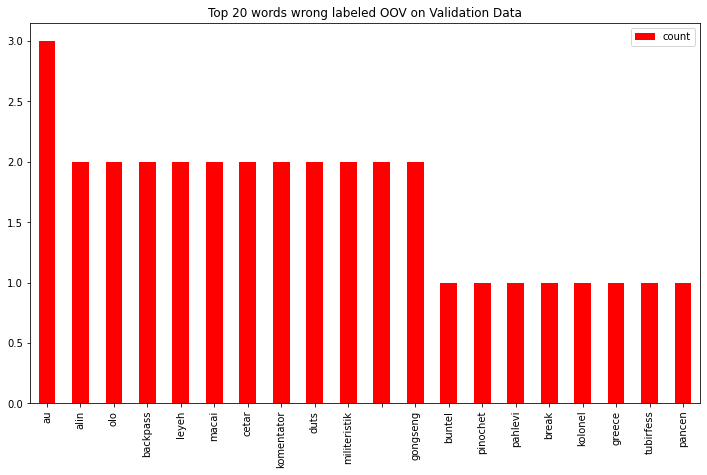

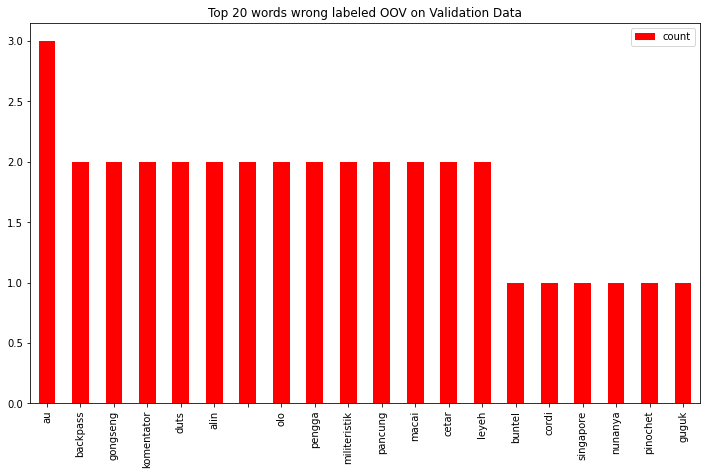

In [101]:
df_oov_val = pd.DataFrame(oov_val_count.items(),columns=["Tweet","count"])
df_oov_val.sort_values(['count'],ascending=False)[1:21].plot(
    kind='bar', y='count',x='Tweet', color='red', title='Top 20 words wrong labeled OOV on Validation Data', figsize=(12,7))
plt.xlabel("")
plt.show()

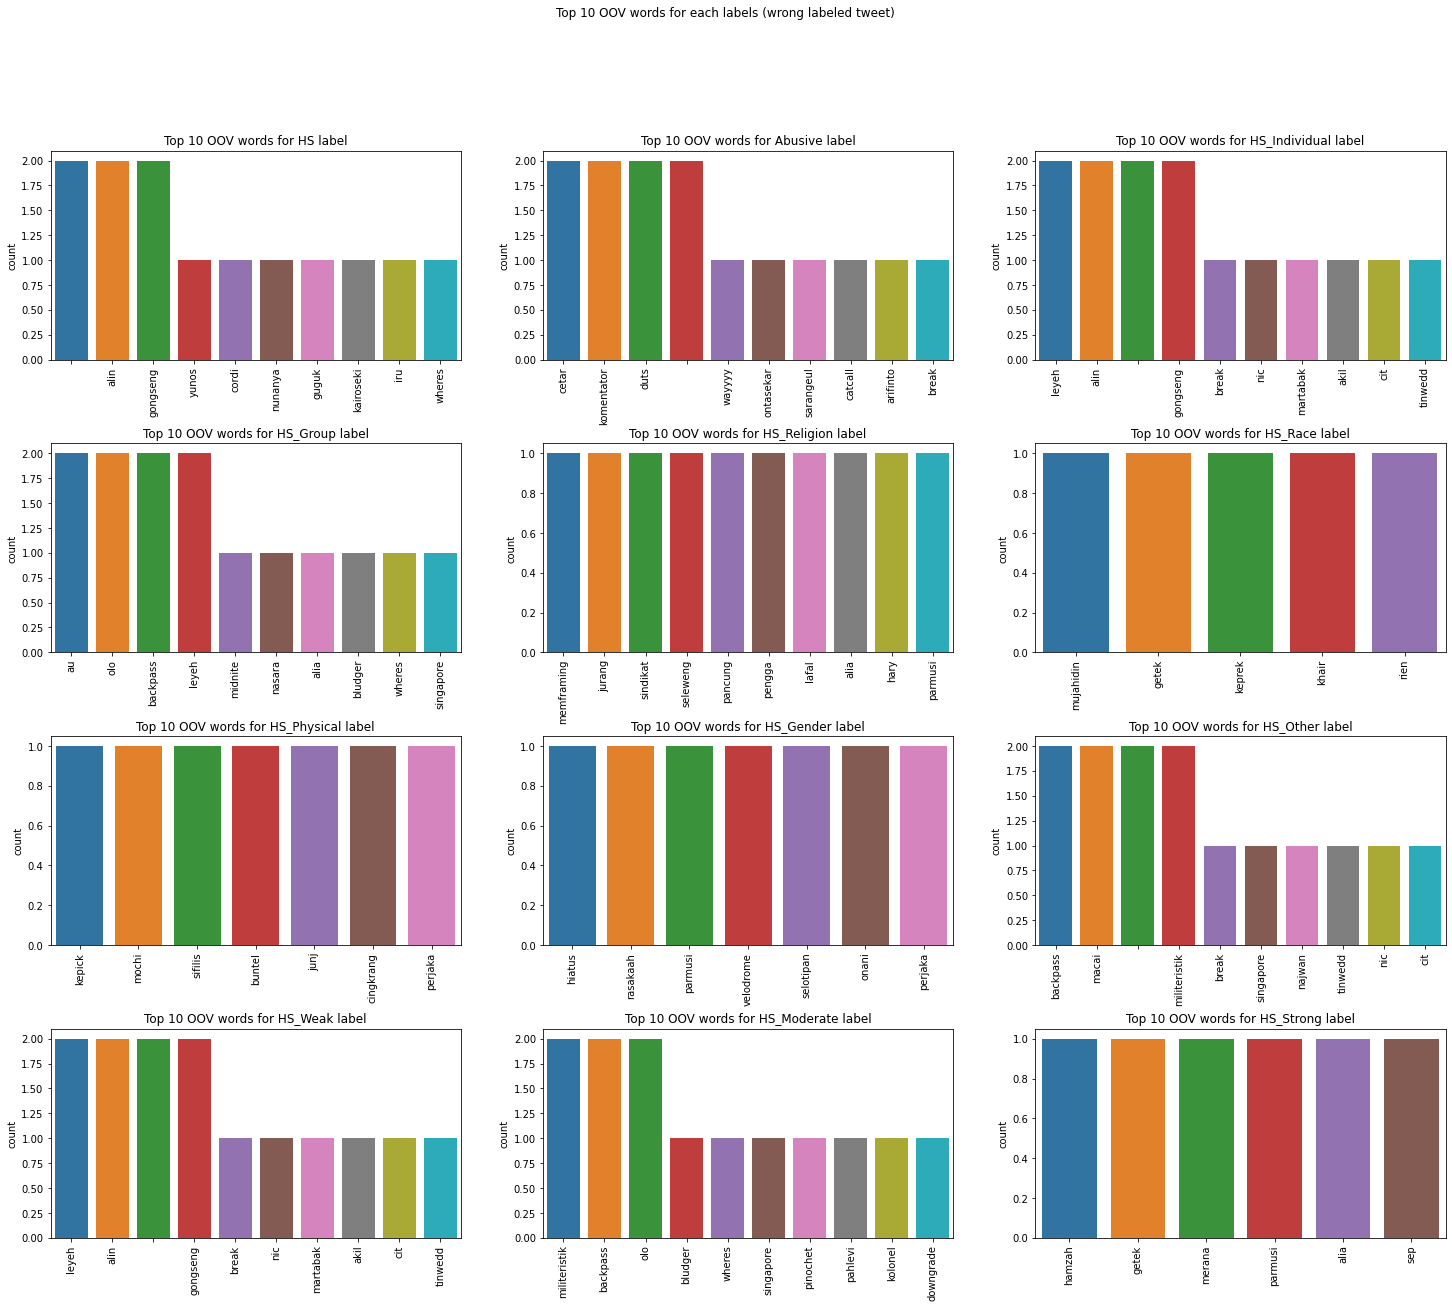

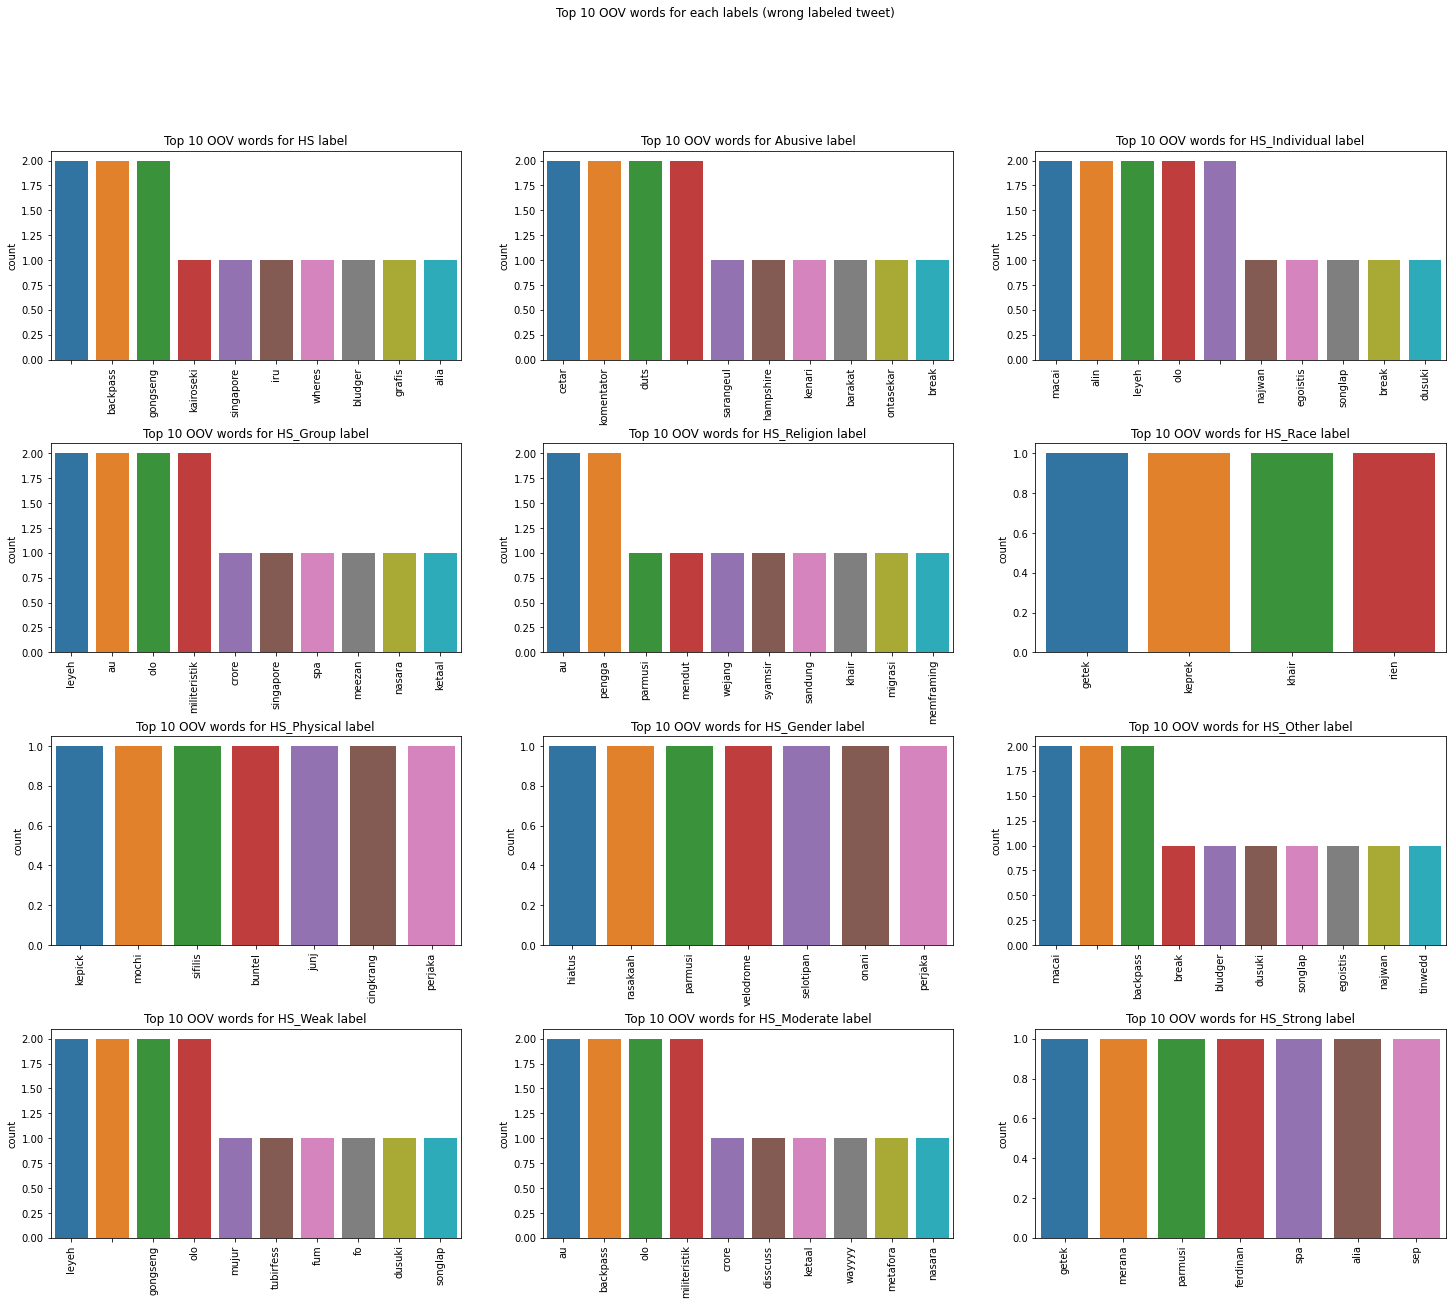

In [102]:
target = y_val.columns

plt.figure(figsize=(25,20))
plt.suptitle('Top 10 OOV words for each labels (wrong labeled tweet)')
for i in range (len(target)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace=0.4)
    wrongtweet = join_data_val[join_data_val[target[i]]!=join_data_val[target[i]+str("_predict")]]
    wrongtoken = generate_ngrams(wrongtweet['Tweet_Parsed']).tolist()
    wrong_oov = oov(vect.index_word.values(), wrongtoken)
    wrong_oov_count = oov_count(wrong_oov)
    frame = pd.DataFrame(wrong_oov_count.items(),columns=["Tweet","count"])
    frame = frame.sort_values(['count'],ascending=False)[1:11]
    sns.barplot(x="Tweet", y="count", data=frame).set_xticklabels(sns.barplot(x="Tweet", y="count", data=frame).get_xticklabels(),rotation=90)
    title='Top 10 OOV words for '+str(target[i])+" label"
    plt.title(title)
    plt.xlabel("")

#### Tweet Check

In [103]:
miss_exact_tweet_val['Tweet_Parsed'].values.tolist()

['orang berengsek dunia',
 'dasar dasar bajing',
 'urus monyet break home teman teman kaya raya h',
 'tai gabung tag tutup lembaga dasar',
 'ampun nyanyi rupiah asing banget',
 'malaysia makhluk kalah bata tunggu timnas malu malaysia',
 'sinting air minum obat',
 'bacot',
 'bahas islam rusak nilai kuat karakter revitalisasi didik nilai',
 'kafir banci ampun kafir banci sedih cong google kafir banci kayak',
 'sendu gila',
 'partai demokrasi indonesia komunis',
 'ajar titik maksud anjing predator kucing mangsa pikir sekolah lelucon tertawa pantat',
 'bosan gaya monoton gaya jual citra pasang wajah melas rakyat',
 'anjir sangka kemarin sarap orangutan istirahat melulu gara gara gagal gerak gagal gerak mantan',
 'laku bangsat harap cinta cundang',
 'tuduh partai komunis indonesia jokowi anti islam rakyat percaya campaign contoh useruser',
 'memframing olah kitab suci milik umat islam umat demo salah batu kecebong leyeh leyeh tonton demo televisi operasi operasi kitab suci busuk',
 'lestari

['orang berengsek dunia',
 'dasar dasar bajing',
 'urus monyet break home teman teman kaya raya h',
 'tai gabung tag tutup lembaga dasar',
 'ampun nyanyi rupiah asing banget',
 'malaysia makhluk kalah bata tunggu timnas malu malaysia',
 'sinting air minum obat',
 'bacot',
 'bahas islam rusak nilai kuat karakter revitalisasi didik nilai',
 'kafir banci ampun kafir banci sedih cong google kafir banci kayak',
 'sendu gila',
 'partai demokrasi indonesia komunis',
 'ajar titik maksud anjing predator kucing mangsa pikir sekolah lelucon tertawa pantat',
 'bosan gaya monoton gaya jual citra pasang wajah melas rakyat',
 'anjir sangka kemarin sarap orangutan istirahat melulu gara gara gagal gerak gagal gerak mantan',
 'laku bangsat harap cinta cundang',
 'tuduh partai komunis indonesia jokowi anti islam rakyat percaya campaign contoh useruser',
 'memframing olah kitab suci milik umat islam umat demo salah batu kecebong leyeh leyeh tonton demo televisi operasi operasi kitab suci busuk',
 'lestari

In [104]:
miss_exact_tweet_val.iloc[:,1:-12].columns

Index(['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race',
       'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate',
       'HS_Strong'],
      dtype='object')

Index(['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race',
       'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate',
       'HS_Strong'],
      dtype='object')

In [105]:
miss_exact_tweet_val.iloc[:,-12:].values.tolist()

[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

### Data Test Predict Result Analysis

In [0]:
data_test_predict = pd.DataFrame(data=data_test['Tweet'],columns=['Tweet']).reset_index(drop=True).join(pd.DataFrame(data=pred_test, columns=y_test.columns)).join(pd.DataFrame(data=data_test['Tweet_Parsed'],columns=['Tweet_Parsed']).reset_index(drop=True))

#### Check Number of Label on Predict Data

In [0]:
label_size0_test = []
label_size1_test = []

for i in data_test.columns[1:-1]:
    label_size0_test.append(len(data_test[data_test[i]==0]))
    label_size1_test.append(len(data_test[data_test[i]==1]))

label_size0_test_predict = []
label_size1_test_predict = []

for i in data_test_predict.columns[1:-1]:
    label_size0_test_predict.append(len(data_test_predict[data_test_predict[i]==0]))
    label_size1_test_predict.append(len(data_test_predict[data_test_predict[i]==1]))

In [0]:
dat_anls_test = pd.DataFrame({
    'label' : data_test.columns[1:-1],
    'stats' : ["negative" for i in range(len(data_test.columns[1:-1]))],
    'jumlah' : label_size0_test
}).append(
    pd.DataFrame({
        'label' : data_test.columns[1:-1],
        'stats' : ["positive" for i in range(len(data_test.columns[1:-1]))],
        'jumlah' : label_size1_test
    })
)

# dat_anls_test = dat_anls_test.set_index(['label'], drop=True)

dat_anls_test_predict = pd.DataFrame({
    'label' : data_test_predict.columns[1:-1],
    'stats' : ["negative" for i in range(len(data_test_predict.columns[1:-1]))],
    'jumlah' : label_size0_test_predict
}).append(
    pd.DataFrame({
        'label' : data_test_predict.columns[1:-1],
        'stats' : ["positive" for i in range(len(data_test_predict.columns[1:-1]))],
        'jumlah' : label_size1_test_predict
    })
)

# dat_anls_test_predict = dat_anls_test_predict.set_index(['label'], drop=True)

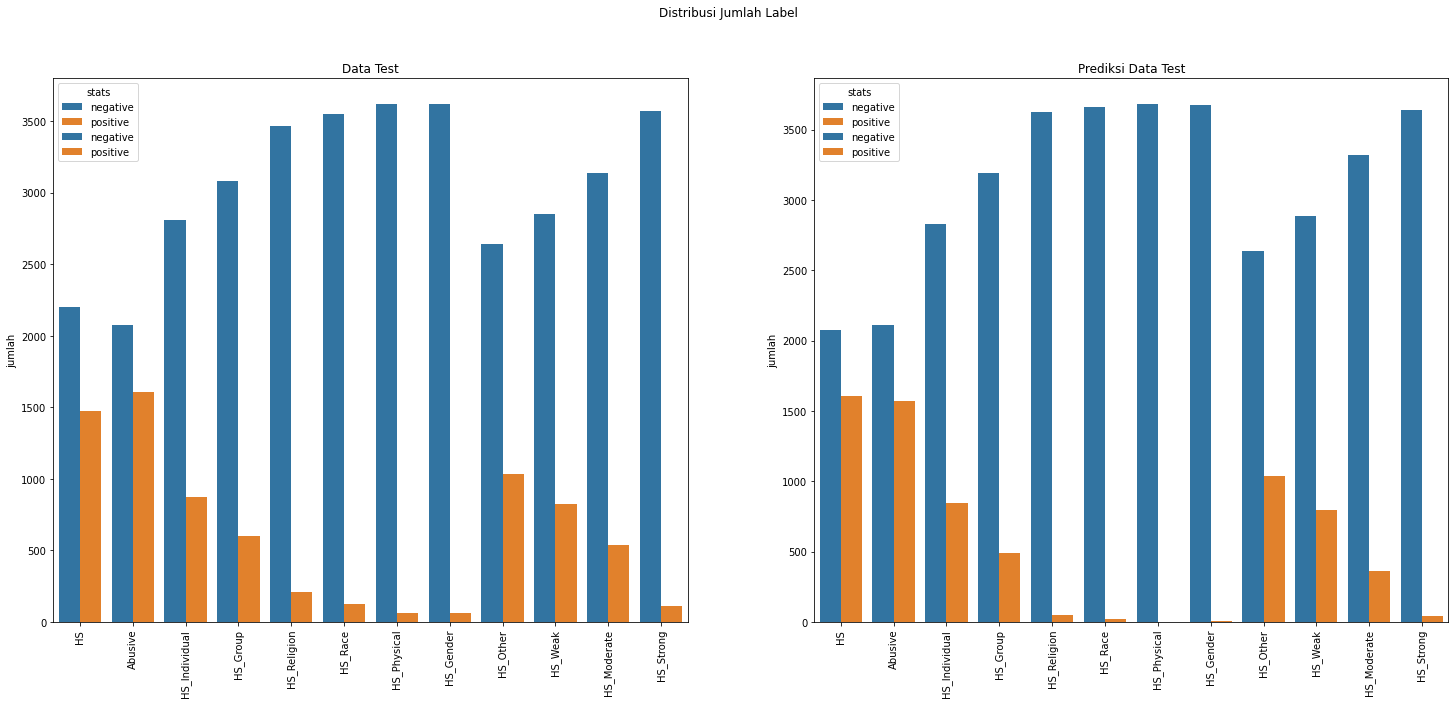

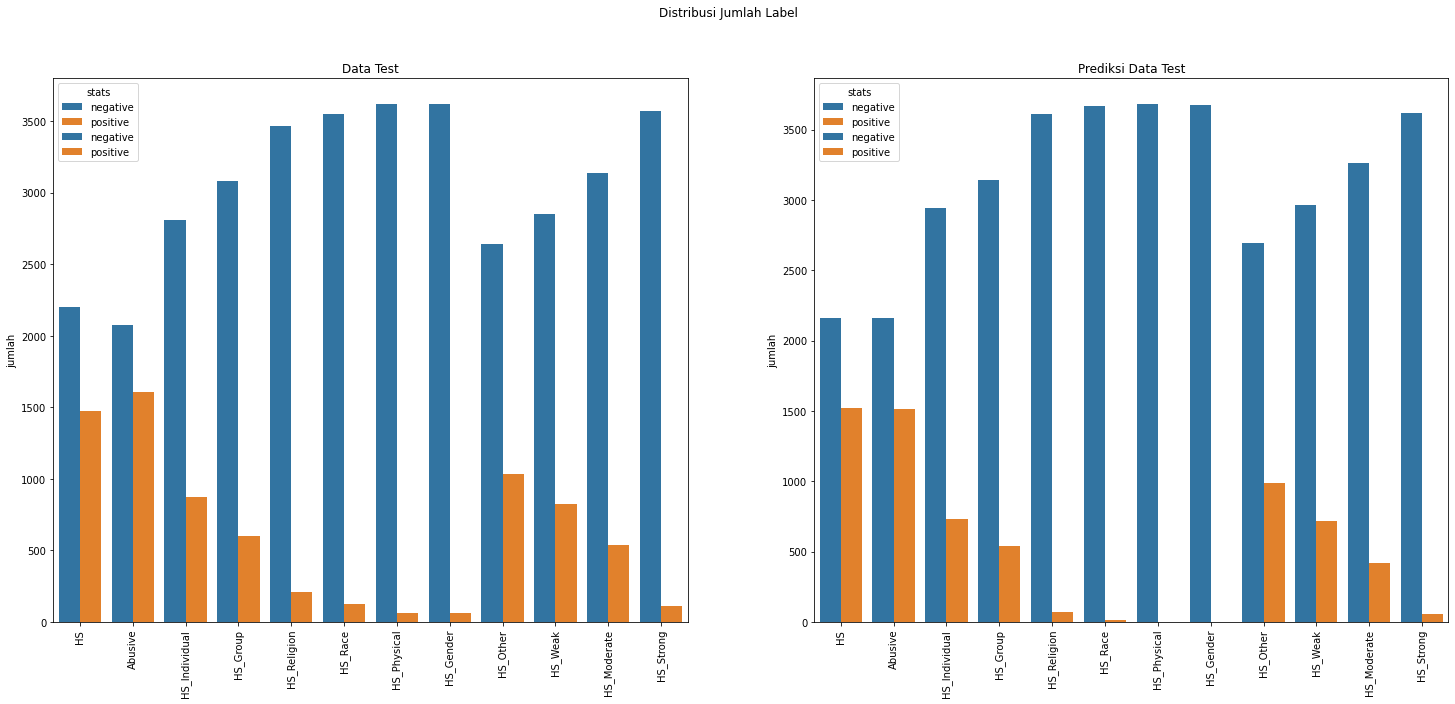

In [109]:
plt.figure(figsize=(25,10))
plt.suptitle('Distribusi Jumlah Label')

plt.subplot(1,2,1)
sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_test).set_xticklabels(sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_test).get_xticklabels(),rotation=90)
plt.title("Data Test")
plt.xlabel('')

plt.subplot(1,2,2)
sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_test_predict).set_xticklabels(sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_test_predict).get_xticklabels(),rotation=90)
plt.title("Prediksi Data Test")
plt.xlabel('')

plt.show()

In [110]:
pd.DataFrame({
    "label" : data_test.columns[1:-1],
    "negative (true)" : dat_anls_test[dat_anls_test['stats'] == "negative"]["jumlah"].values,
    "positive (true)" : dat_anls_test[dat_anls_test['stats'] == "positive"]["jumlah"].values,
    "negative (predict)" : dat_anls_test_predict[dat_anls_test_predict['stats'] == "negative"]["jumlah"].values,
    "positive (predict)" : dat_anls_test_predict[dat_anls_test_predict['stats'] == "positive"]["jumlah"].values
})

,label,negative (true),positive (true),negative (predict),positive (predict)
0,HS,2204,1476,2074,1606
1,Abusive,2075,1605,2111,1569
2,HS_Individual,2806,874,2831,849
3,HS_Group,3078,602,3190,490
4,HS_Religion,3467,213,3627,53
5,HS_Race,3551,129,3661,19
6,HS_Physical,3617,63,3680,0
7,HS_Gender,3616,64,3673,7
8,HS_Other,2643,1037,2639,1041
9,HS_Weak,2854,826,2883,797


,label,negative (true),positive (true),negative (predict),positive (predict)
0,HS,2204,1476,2159,1521
1,Abusive,2075,1605,2164,1516
2,HS_Individual,2806,874,2944,736
3,HS_Group,3078,602,3142,538
4,HS_Religion,3467,213,3611,69
5,HS_Race,3551,129,3666,14
6,HS_Physical,3617,63,3680,0
7,HS_Gender,3616,64,3678,2
8,HS_Other,2643,1037,2692,988
9,HS_Weak,2854,826,2965,715


#### OOV Check

In [0]:
join_data_test = data_test.join(data_test_predict.drop(['Tweet','Tweet_Parsed'],axis=1),rsuffix="_predict")

In [0]:
miss_exact_tweet_test = join_data_test[(join_data_test["HS"]!=join_data_test["HS_predict"]) | (join_data_test["Abusive"] != join_data_test["Abusive_predict"]) | (join_data_test["HS_Individual"] != join_data_test["HS_Individual_predict"]) | (join_data_test["HS_Group"] != join_data_test["HS_Group_predict"]) | (join_data_test["HS_Religion"] != join_data_test["HS_Religion_predict"]) | (join_data_test["HS_Race"] != join_data_test["HS_Race"]) | (join_data_test["HS_Physical"] != join_data_test["HS_Physical_predict"]) | (join_data_test["HS_Gender"] != join_data_test["HS_Gender_predict"]) | (join_data_test["HS_Other"] != join_data_test["HS_Other_predict"]) | (join_data_test["HS_Weak_predict"] != join_data_test["HS_Weak_predict"]) | (join_data_test["HS_Moderate_predict"] != join_data_test["HS_Moderate_predict"]) | (join_data_test["HS_Strong_predict"] != join_data_test["HS_Strong_predict"])]

In [0]:
oov_test = oov(vect.index_word.values(), generate_ngrams(miss_exact_tweet_test['Tweet_Parsed']))
oov_test_count = oov_count(oov_test)

In [114]:
oov_test_count

{'': 1433,
 'adora': 1,
 'aec': 1,
 'afai': 1,
 'afno': 1,
 'agel': 1,
 'agnesmo': 1,
 'alina': 1,
 'alonso': 1,
 'alpha': 1,
 'alucard': 1,
 'alumunium': 1,
 'angle': 1,
 'anjiiirr': 1,
 'anon': 1,
 'apprently': 1,
 'ardhog': 1,
 'ashraf': 1,
 'asus': 1,
 'atip': 1,
 'auti': 2,
 'azadi': 1,
 'babang': 1,
 'back': 1,
 'badik': 1,
 'bagak': 1,
 'bagja': 1,
 'bahana': 1,
 'baja': 1,
 'bajul': 1,
 'bale': 1,
 'balur': 2,
 'bangsar': 1,
 'bantat': 1,
 'baperki': 1,
 'barkley': 1,
 'batch': 1,
 'bbb': 1,
 'becky': 2,
 'beer': 1,
 'benalu': 1,
 'berkotey': 1,
 'bersyariah': 1,
 'besanding': 1,
 'beyek': 1,
 'bharat': 1,
 'bhencho': 1,
 'bich': 1,
 'bidah': 1,
 'bjp': 1,
 'blo': 1,
 'boba': 1,
 'bogan': 1,
 'boraks': 1,
 'bosch': 1,
 'bowie': 1,
 'bromo': 1,
 'bubu': 1,
 'buh': 1,
 'buluk': 1,
 'cabai': 1,
 'cai': 1,
 'camni': 1,
 'camsex': 1,
 'canon': 1,
 'capap': 2,
 'cbc': 1,
 'cece': 1,
 'cecer': 2,
 'cecurut': 1,
 'cecyl': 1,
 'cekak': 1,
 'celcom': 1,
 'cepek': 1,
 'chani': 1,
 'cheeky

{'': 1425,
 'adora': 1,
 'aec': 1,
 'afai': 1,
 'afno': 1,
 'agel': 1,
 'agnesmo': 1,
 'alina': 1,
 'alonso': 1,
 'alpha': 1,
 'alucard': 1,
 'ancurnya': 1,
 'angle': 1,
 'anjiiirr': 1,
 'anon': 1,
 'apprently': 1,
 'ardhog': 1,
 'ashraf': 1,
 'atip': 1,
 'auti': 2,
 'azadi': 1,
 'babang': 1,
 'back': 1,
 'badik': 1,
 'bagak': 1,
 'bahana': 1,
 'bajul': 1,
 'bale': 1,
 'balur': 2,
 'bangsar': 1,
 'bantat': 1,
 'baperki': 1,
 'barkley': 1,
 'batch': 1,
 'bbb': 1,
 'becky': 2,
 'beer': 1,
 'benalu': 1,
 'berkotey': 1,
 'bersyariah': 1,
 'besanding': 1,
 'beyek': 1,
 'bharat': 1,
 'bhencho': 1,
 'bich': 1,
 'bidah': 1,
 'bjp': 1,
 'blo': 1,
 'boba': 1,
 'bogan': 1,
 'boraks': 1,
 'bosch': 1,
 'bowie': 1,
 'bromo': 1,
 'bubu': 1,
 'buh': 1,
 'buletin': 1,
 'buluk': 1,
 'cabai': 1,
 'cai': 1,
 'camni': 1,
 'camsex': 1,
 'canon': 1,
 'capap': 2,
 'cbc': 1,
 'cece': 1,
 'cecer': 3,
 'cecurut': 1,
 'cecyl': 1,
 'cekak': 1,
 'celcom': 1,
 'cepek': 1,
 'chani': 1,
 'cheeky': 1,
 'cher': 1,
 'chi

In [115]:
print("number of OOV words : ", len(oov_test))
print("number of unique OOV words : ", len(oov_test_count))

number of OOV words :  2106
number of unique OOV words :  624
number of OOV words :  2127
number of unique OOV words :  646


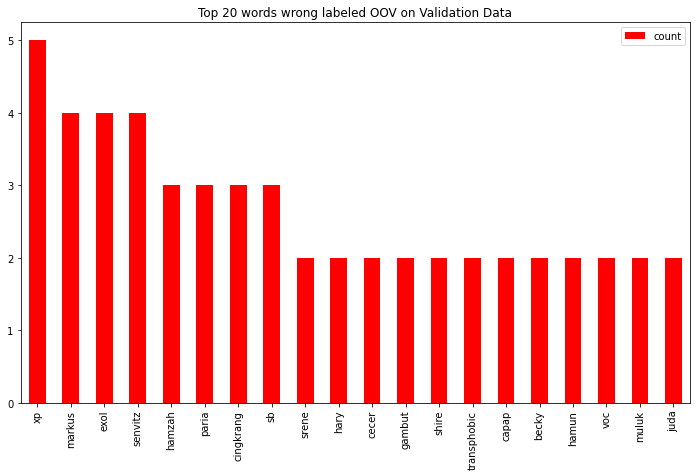

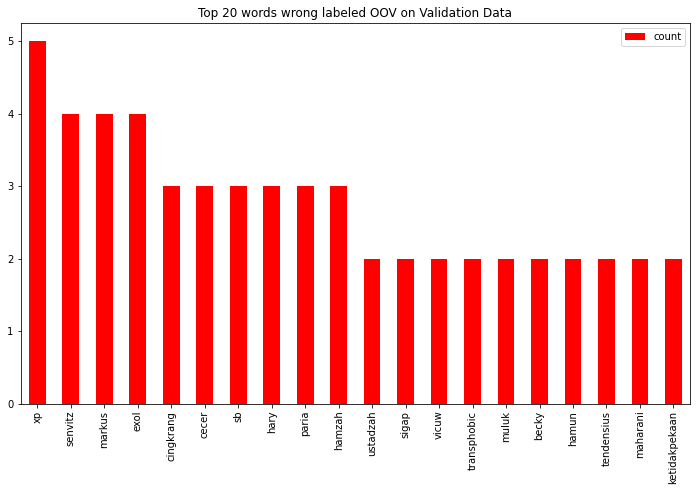

In [116]:
df_oov_test = pd.DataFrame(oov_test_count.items(),columns=["Tweet","count"])
df_oov_test.sort_values(['count'],ascending=False)[1:21].plot(
    kind='bar', y='count',x='Tweet', color='red', title='Top 20 words wrong labeled OOV on Validation Data', figsize=(12,7))
plt.xlabel("")
plt.show()

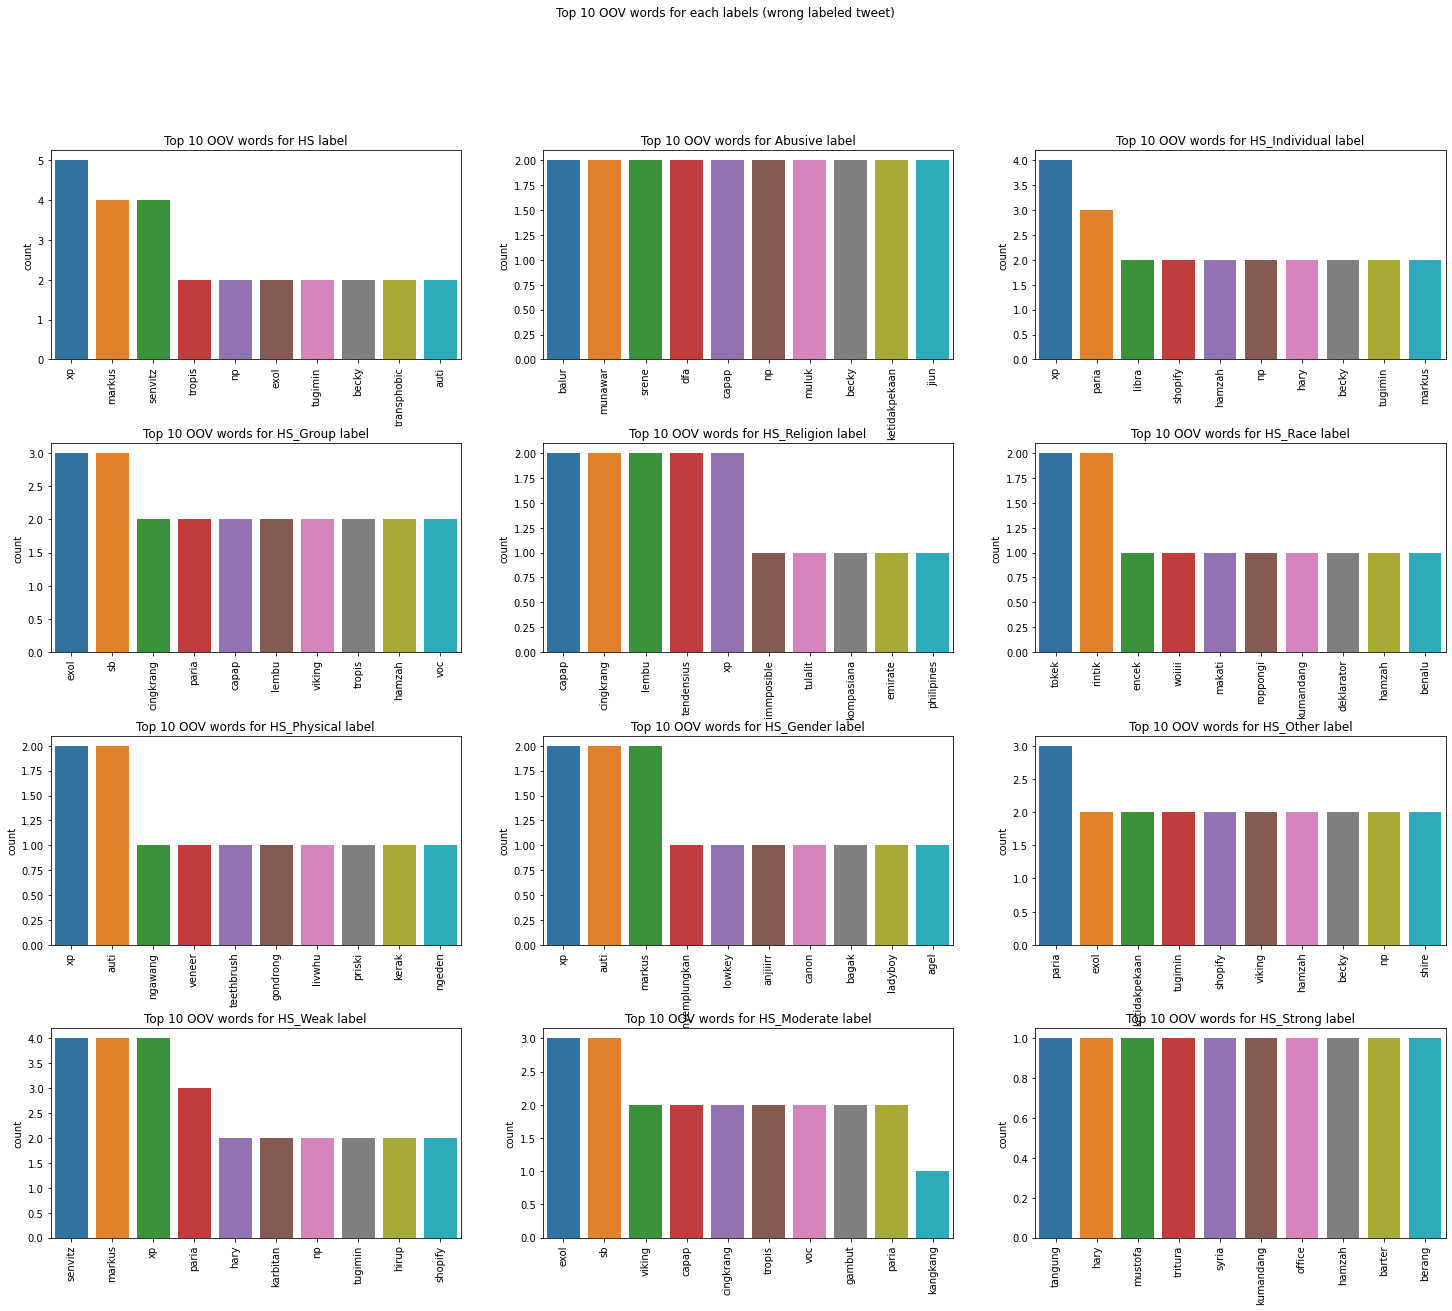

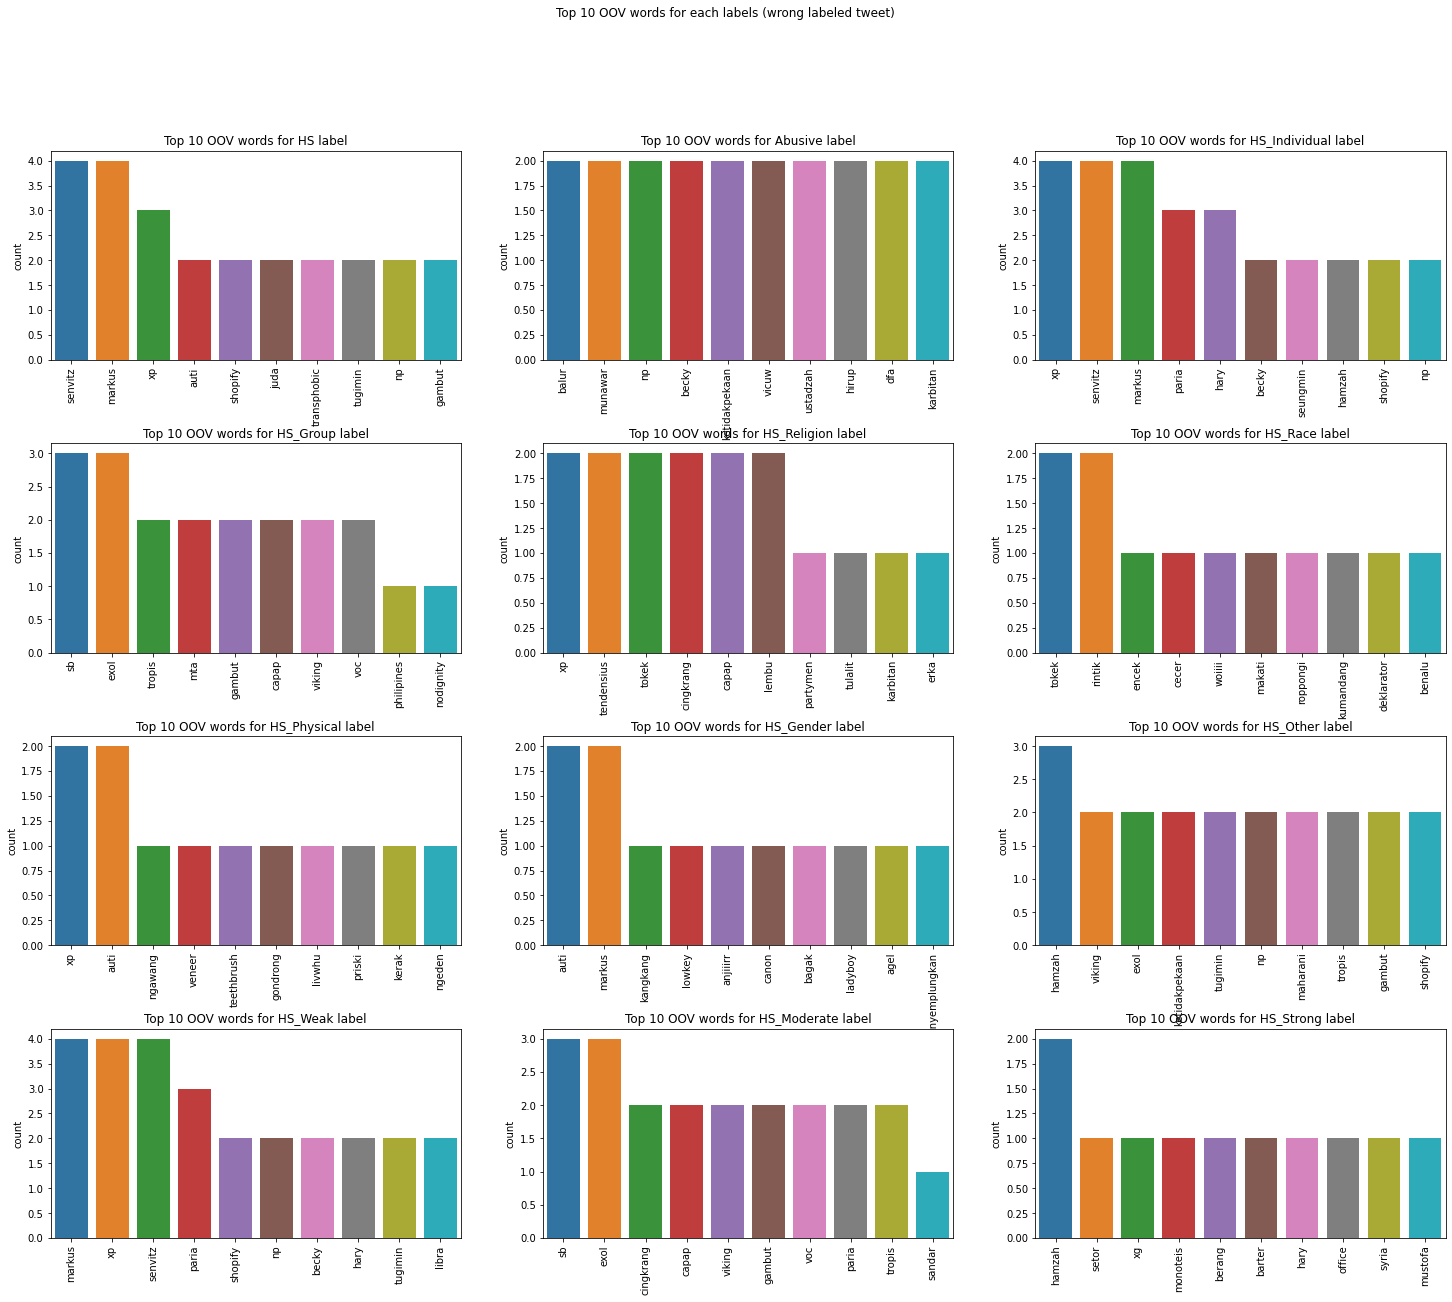

In [117]:
target = y_test.columns

plt.figure(figsize=(25,20))
plt.suptitle('Top 10 OOV words for each labels (wrong labeled tweet)')
for i in range (len(target)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace=0.4)
    wrongtweet = join_data_test[join_data_test[target[i]]!=join_data_test[target[i]+str("_predict")]]
    wrongtoken = generate_ngrams(wrongtweet['Tweet_Parsed']).tolist()
    wrong_oov = oov(vect.index_word.values(), wrongtoken)
    wrong_oov_count = oov_count(wrong_oov)
    frame = pd.DataFrame(wrong_oov_count.items(),columns=["Tweet","count"])
    frame = frame.sort_values(['count'],ascending=False)[1:11]
    sns.barplot(x="Tweet", y="count", data=frame).set_xticklabels(sns.barplot(x="Tweet", y="count", data=frame).get_xticklabels(),rotation=90)
    title='Top 10 OOV words for '+str(target[i])+" label"
    plt.title(title)
    plt.xlabel("")

#### Tweet Check

In [118]:
miss_exact_tweet_test['Tweet'].values.tolist()

["GANTENG TAPI BERENGSEK!!! BUAT APA?!!\nWHO DO YOU THINK YOU ARE? YOU'RE NOTHING!! TO ME! << REMEMBER THIS!!",
 'Does insulting one for being "Cina", "Kafir", make you a better Muslim?',
 "USER USER Karena partaimu pdip itu bajingan'",
 "USER Khan yg ngajarin si garong kafir'",
 "USER Anak pecun... ga jauh2 dr hobi zina.. haha'",
 'USER Udah siap di demo berjilid2 sama bani cingkrang ? Malaysia memberlakukan syariat Islam, tapi melegalkan perjudian dengan berbagai syarat dan ketentuan yg "strict".\'',
 "Hamdalah. Kelar juga ini fitur keparat.'",
 "USER Jancuk! Pingin gue tabok itu anak'",
 "USER Sebenernya siapa sih yang mempunyai hak untuk menyatakan bahwa orang itu kafir? Dan jika semua orang mempunyai hak, apa kriteria kafir itu?'",
 "USER USER USER USER USER USER iyain dah tante jablay wkwk'",
 'I like you. You like him, itukan berengsek :3 #nyampah',
 'indonesia: literally suffocating from the air pollution\n\nthe kampungan people watching over their trash burning:  pic.twitter.c

["GANTENG TAPI BERENGSEK!!! BUAT APA?!!\nWHO DO YOU THINK YOU ARE? YOU'RE NOTHING!! TO ME! << REMEMBER THIS!!",
 'Does insulting one for being "Cina", "Kafir", make you a better Muslim?',
 "USER Khan yg ngajarin si garong kafir'",
 "USER Anak pecun... ga jauh2 dr hobi zina.. haha'",
 'USER Udah siap di demo berjilid2 sama bani cingkrang ? Malaysia memberlakukan syariat Islam, tapi melegalkan perjudian dengan berbagai syarat dan ketentuan yg "strict".\'',
 "Hamdalah. Kelar juga ini fitur keparat.'",
 "USER Jancuk! Pingin gue tabok itu anak'",
 "USER Sebenernya siapa sih yang mempunyai hak untuk menyatakan bahwa orang itu kafir? Dan jika semua orang mempunyai hak, apa kriteria kafir itu?'",
 'I like you. You like him, itukan berengsek :3 #nyampah',
 'indonesia: literally suffocating from the air pollution\n\nthe kampungan people watching over their trash burning:  pic.twitter.com/4ny5B7F2uX',
 '#MataNajwaDebatJakarta lucu banget jawaban ahok.. gak nyambung. Ditanya apa di jawab apa. Kena

In [119]:
miss_exact_tweet_test['Tweet_Parsed'].values.tolist()

['ganteng tapi berengsek buat apa  anda pikir anda anda kembali apa apa kepada saya ingat ini',
 'tidak hina satu untuk jadi cina kafir buat anda lebih baik muslim',
 'guna guna karena partai partai demokrasi indonesia juang itu bajing',
 'guna   ajar  garong kafir',
 'guna anak pecun tidak jauh jauh dari hobi zina ',
 'guna sudah siap di demo jilid jilid sama ban cingkrang malaysia laku syariat islam tapi legal judi dengan different syarat dan tentu  ketat',
 'hamdalah selesai also nyanyi fitur keparat',
 'guna jancuk ingin aku tabok itu anak',
 'guna benar siapa   punya hak untuk review nyata bahwa orangutan itu kafir dan jika semua orangutan punya hak apa kriteria kafir itu',
 'guna guna guna guna guna guna iya sudah tante jablay ',
 'i seperti anda anda seperti dia itu  berengsek sampah',
 'indonesia harfiah cekik dari polusi udara orang orang kampung tonton lebih bakar sampah mereka',
 'mata najwa debat jakarta lucu banget jawab anda ahok tidak sambung tanya apa di jawab apa kena 

['ganteng tapi berengsek buat apa  anda pikir anda anda kembali apa apa kepada saya ingat ini',
 'tidak hina satu untuk jadi cina kafir buat anda lebih baik muslim',
 'guna   ajar  garong kafir',
 'guna anak pecun tidak jauh jauh dari hobi zina ',
 'guna sudah siap di demo jilid jilid sama ban cingkrang malaysia laku syariat islam tapi legal judi dengan different syarat dan tentu  ketat',
 'hamdalah selesai also nyanyi fitur keparat',
 'guna jancuk ingin aku tabok itu anak',
 'guna benar siapa   punya hak untuk review nyata bahwa orangutan itu kafir dan jika semua orangutan punya hak apa kriteria kafir itu',
 'i seperti anda anda seperti dia itu  berengsek sampah',
 'indonesia harfiah cekik dari polusi udara orang orang kampung tonton lebih bakar sampah mereka',
 'mata najwa debat jakarta lucu banget jawab anda ahok tidak sambung tanya apa di jawab apa kena sekak mat di tanya isu agama tadi dasar dasar cina tolol ',
 'guna astaga sewa pecun sekali tidak pak',
 'guna jadi pilih mau bung

In [120]:
miss_exact_tweet_test.iloc[:,1:-13].columns

Index(['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race',
       'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate',
       'HS_Strong'],
      dtype='object')

Index(['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race',
       'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate',
       'HS_Strong'],
      dtype='object')

In [121]:
# real label
miss_exact_tweet_test.iloc[:,1:-13].values.tolist()

[[1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 1, 0, 0,

[[1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0,

In [122]:
miss_exact_tweet_test.iloc[:,-12:].values.tolist()

[[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0

[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [0]:
miss_exact_tweet_test.to_csv("/content/gdrive/My Drive/Colab Notebooks/TA/bestresult_CNN_trans_nostopword.csv",index=False,sep=";")